In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
product_data = pd.read_csv('sample_result_dataset/product.csv')
customer_data = pd.read_csv('sample_result_dataset/customer.csv')
order_data = pd.read_csv('sample_result_dataset/order.csv')
date_data = pd.read_csv('sample_result_dataset/date.csv')
employee_data = pd.read_csv('sample_result_dataset/employee.csv')
gift_data = pd.read_csv('sample_result_dataset/gift.csv')
order_item = pd.read_csv('sample_result_dataset/order_item.csv')
review_data = pd.read_csv('sample_result_dataset/review.csv')
department_data = pd.read_csv('sample_result_dataset/department.csv')
gift_exchange_data = pd.read_csv('sample_result_dataset/gift_exchange.csv')

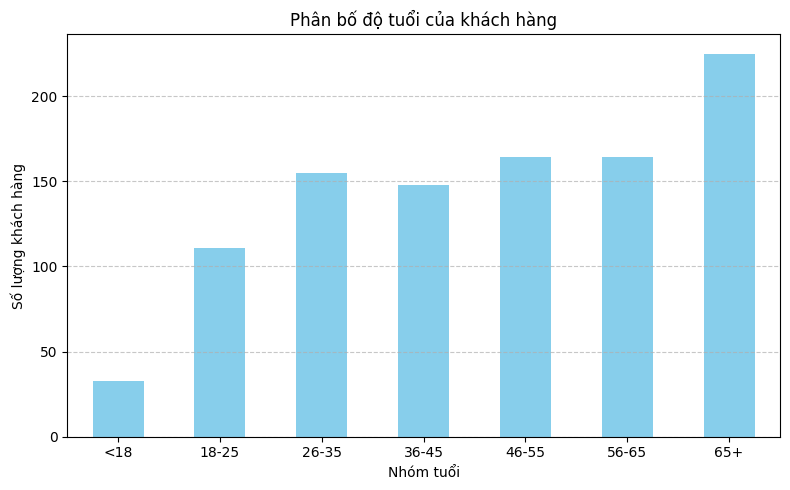

In [4]:
# 1. Phân tích khách hàng

# Chuyển ngày sinh thành datetime
customer_data['DOB'] = pd.to_datetime(customer_data['DOB'], errors='coerce')
customer_data['customer_since'] = pd.to_datetime(customer_data['customer_since'], errors='coerce')

# Tính toán độ tuổi của khách hàng
current_date = pd.to_datetime('now')
customer_data['age'] = (current_date - customer_data['DOB']).dt.days // 365

# Phân đoạn nhóm tuổi
age_bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
age_labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']

customer_data['age_group'] = pd.cut(customer_data['age'], bins=age_bins, labels=age_labels,include_lowest=True ,right=False)

# Vẽ biểu đồ phân bố độ tuổi của khách hàng
plt.figure(figsize=(8,5))
customer_data['age_group'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Phân bố độ tuổi của khách hàng')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Số lượng khách hàng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

age_group
<18      1197.484848
18-25    1197.504505
26-35    1219.070968
36-45    1173.324324
46-55    1207.518293
56-65    1187.743902
65+      1198.733333
Name: point, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2173163142.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_point = customer_data.groupby('age_group')['point'].mean()


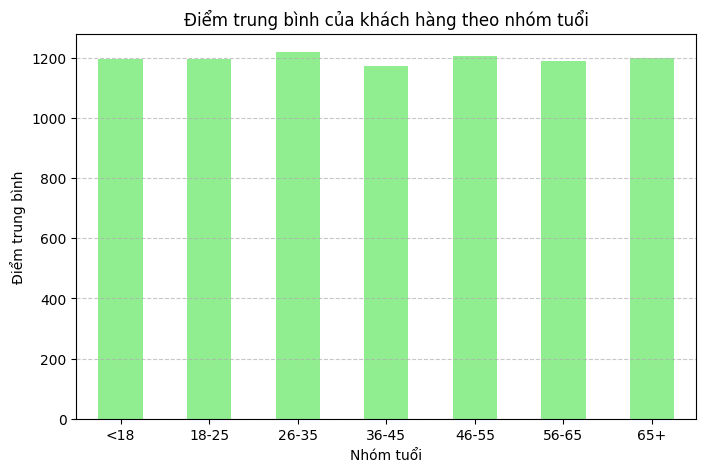

In [5]:
# Tính điểm trung bình của khách hàng theo nhóm tuổi
age_point = customer_data.groupby('age_group')['point'].mean()
print(age_point)

# Vẽ biểu đồ điểm trung bình của khách hàng theo nhóm tuổi
plt.figure(figsize=(8,5))
age_point.plot(kind='bar', color='lightgreen')
plt.title('Điểm trung bình của khách hàng theo nhóm tuổi')
plt.xlabel('Nhóm tuổi')
plt.ylabel('Điểm trung bình')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout
plt.show()


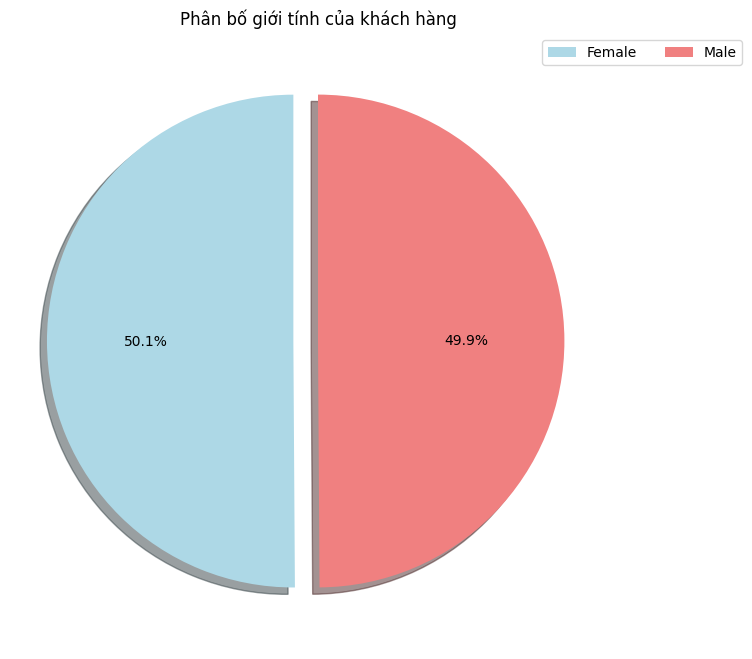

In [6]:
# Phân đoạn theo giới tính

# Vẽ biểu đồ phân bố giới tính của khách hàng dưới dạng biểu đồ tròn với chú thích
plt.figure(figsize=(8, 8))
gender_counts = customer_data['gender'].value_counts()
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, labels = ['',''], colors=['lightblue', 'lightcoral'], shadow=True, explode=(0.1, 0))
plt.title('Phân bố giới tính của khách hàng')
plt.ylabel('')
plt.legend(labels =['Female', 'Male'], loc='best', bbox_to_anchor=(1.2, 1), ncol = 2)
plt.show()




In [7]:
# Tính điểm trung bình của khách hàng theo giới tính
gender_avg_point = customer_data.groupby('gender')['point'].mean()
print(gender_avg_point)


gender
F    1201.430862
M    1193.756487
Name: point, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\1155719839.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='quantity', data=top_quantity, palette='viridis')


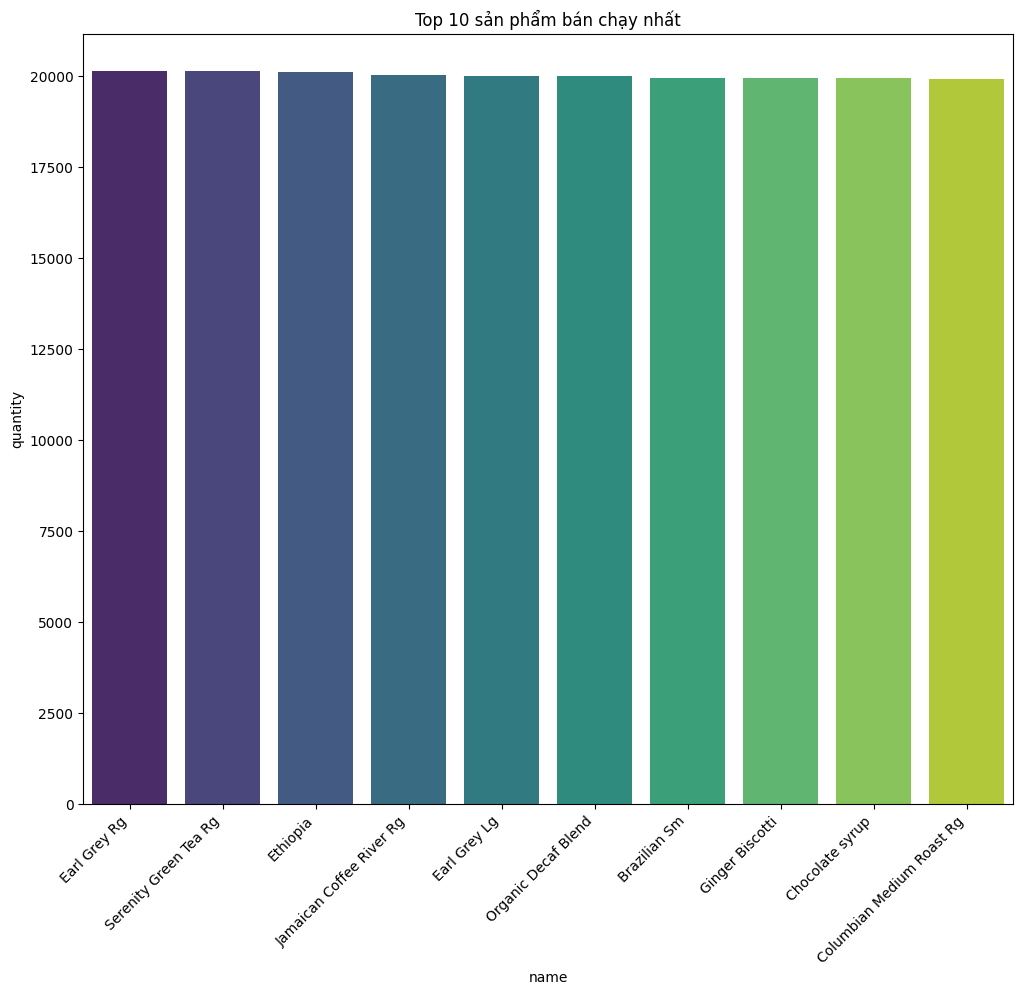

In [8]:
# 2. Phân tích hành vi mua hàng và hiệu suất bán hàng

# Kết hợp bảng order_item và product để lấy thông tin sản phẩm
order_item_product = pd.merge(order_item, product_data[['productId', 'name', 'category']], on='productId', how='left')


# Tính tổng SL bán ra theo product_id
top_quantity = order_item_product.groupby('productId')['quantity'].sum().reset_index()
top_quantity = pd.merge(top_quantity, product_data[['productId', 'name']], on='productId', how='left')
top_quantity = top_quantity.sort_values(by='quantity', ascending=False).head(10)

# Vẽ biểu đồ cột cho 10 sản phẩm bán chạy nhất
plt.figure(figsize=(12, 10))
top_quantity['short_name'] = top_quantity['name'].apply(lambda x: x.split()[-1])
sns.barplot(x='name', y='quantity', data=top_quantity, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 sản phẩm bán chạy nhất')

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2450006487.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='name', data=top_revenue, palette='Greens_r')


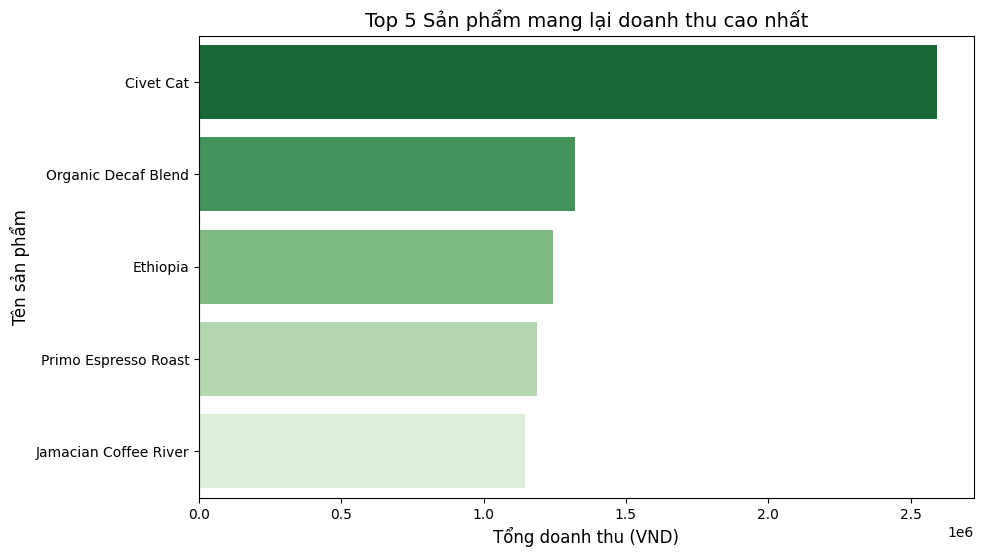

In [9]:
# Tính tổng doanh thu theo product_id
order_item['revenue'] = order_item['quantity'] * order_item['price']
top_revenue = order_item.groupby('productId')['revenue'].sum().reset_index()
top_revenue = pd.merge(top_revenue, product_data[['productId', 'name']], on='productId')
top_revenue = top_revenue.sort_values('revenue', ascending=False).head(5)

# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.barplot(x='revenue', y='name', data=top_revenue, palette='Greens_r')
plt.title('Top 5 Sản phẩm mang lại doanh thu cao nhất', fontsize=14)
plt.xlabel('Tổng doanh thu (VND)', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\43949516.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=top_rated, palette='Purples_r')


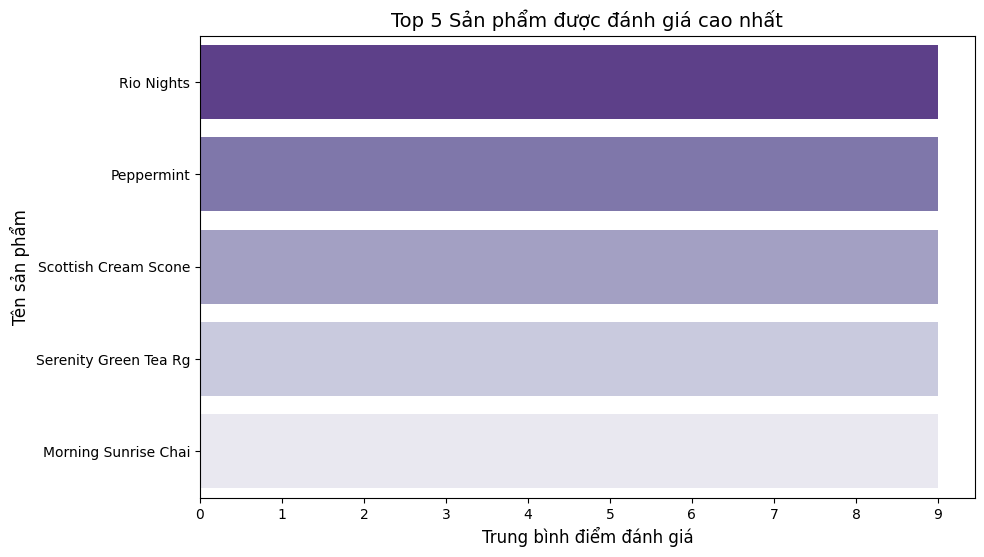

In [10]:
# Đánh giá của khách hàng

# Tính trung bình rating của sản phẩm theo product_id

top_rated = review_data.groupby('productId')['rating'].mean().reset_index()
top_rated = pd.merge(top_rated, product_data[['productId', 'name']], on='productId')
top_rated = top_rated.sort_values(by='rating', ascending=False).head(5)

# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=top_rated, palette='Purples_r')
plt.title('Top 5 Sản phẩm được đánh giá cao nhất', fontsize=14)
plt.xlabel('Trung bình điểm đánh giá', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.xticks(np.arange(0, top_rated['rating'].max() + 1, 1))  
plt.show()



C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\1829999950.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='name', data=low_rated, palette='Reds_r')


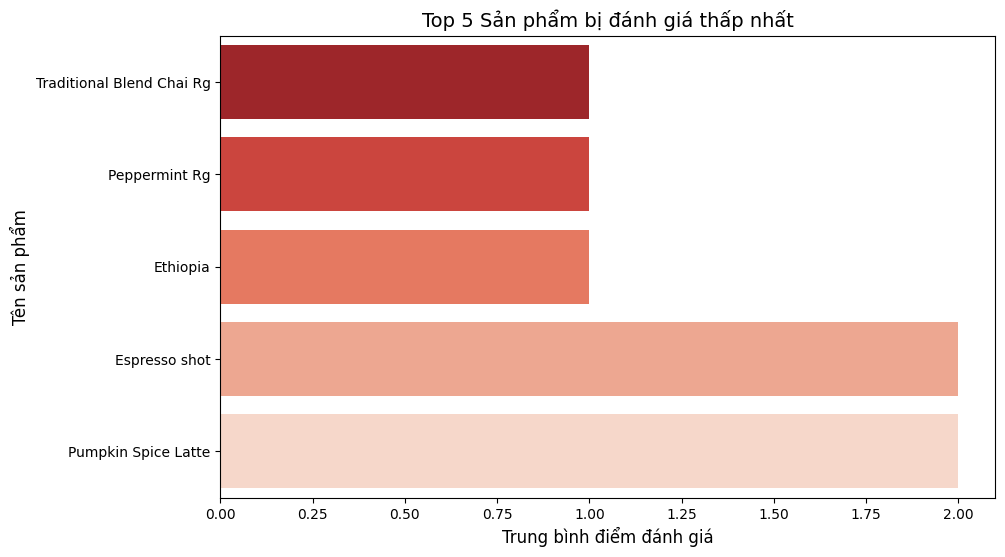

In [11]:
# Sản phẩm bị đánh giá thấp 

low_rated = review_data.groupby('productId')['rating'].mean().reset_index()
low_rated = pd.merge(low_rated, product_data[['productId', 'name']], on='productId')
low_rated = low_rated.sort_values(by='rating', ascending=True).head(5)

# Trực quan hóa
plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='name', data=low_rated, palette='Reds_r')
plt.title('Top 5 Sản phẩm bị đánh giá thấp nhất', fontsize=14)
plt.xlabel('Trung bình điểm đánh giá', fontsize=12)
plt.ylabel('Tên sản phẩm', fontsize=12)
plt.show()

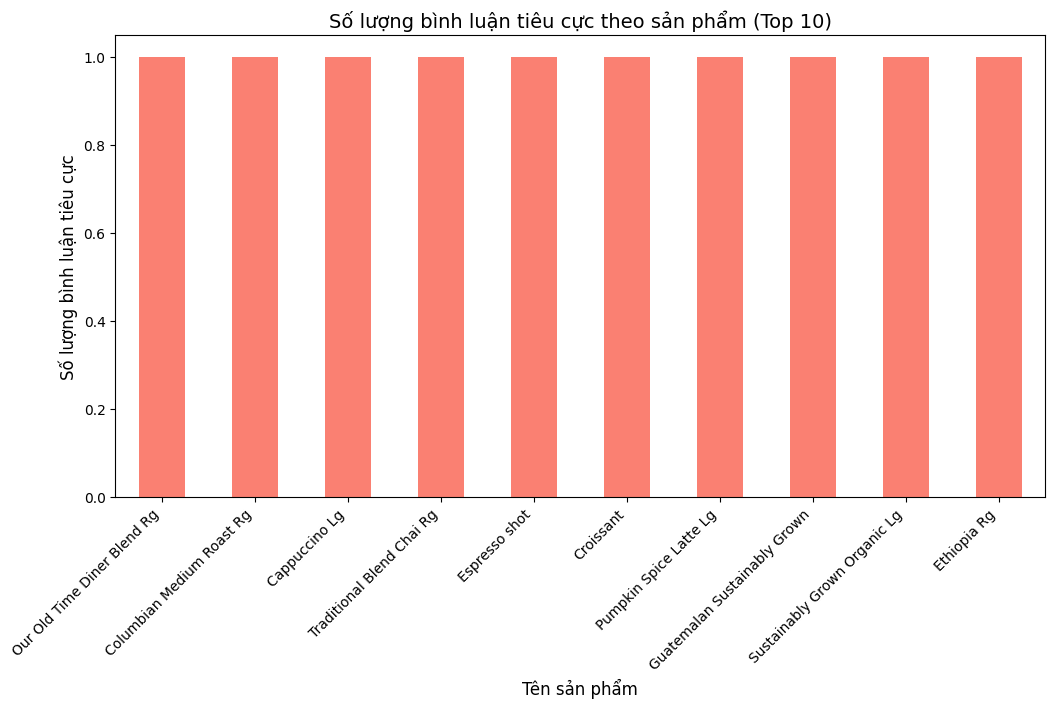

In [12]:
# Bình luận tiêu cực

negative_cmt = review_data[review_data['rating'] < 3]
negative_cmt = pd.merge(negative_cmt, product_data[['productId', 'name']], on='productId', how='inner')
negative_cmt_count = negative_cmt['name'].value_counts().head(10)

# Trực quan hóa
plt.figure(figsize=(12, 6))
negative_cmt_count.plot(kind='bar', color='salmon')
plt.title('Số lượng bình luận tiêu cực theo sản phẩm (Top 10)', fontsize=14)
plt.xlabel('Tên sản phẩm', fontsize=12)
plt.ylabel('Số lượng bình luận tiêu cực', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


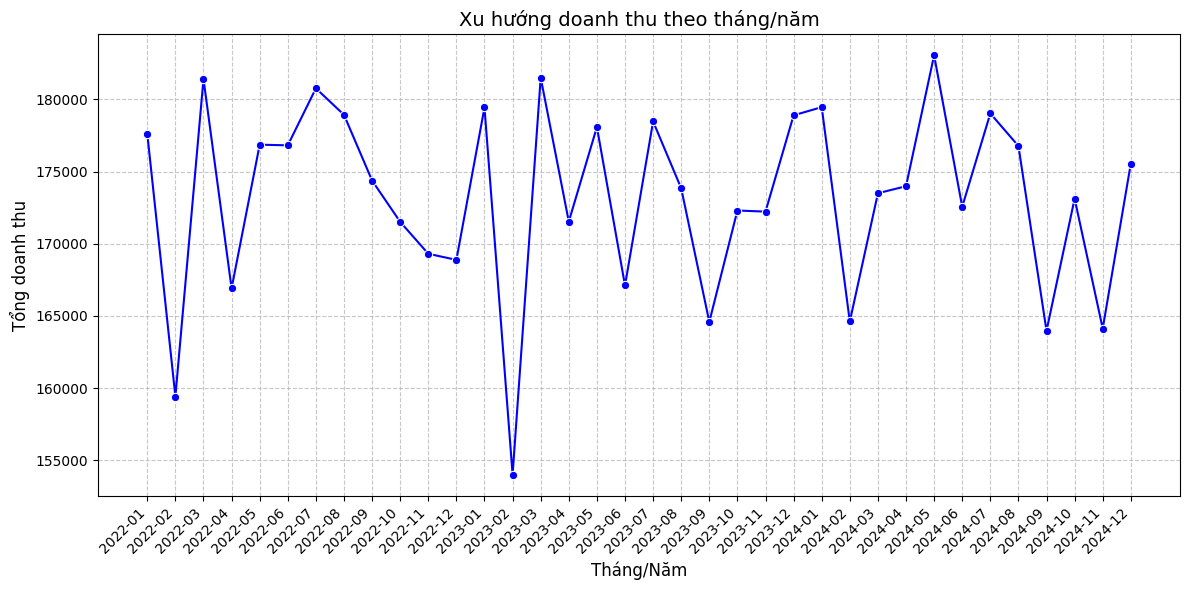

In [54]:
# 3.Phân tích xu hướng doanh thu và đơn hàng theo thời gian

# Chuyển đổi orderDate thành định dạng datetime
order_data['orderDate'] = pd.to_datetime(order_data['orderDate'], format='%Y%m%d')

# Thêm cột tháng/năm để phân tích
order_data['month_year'] = order_data['orderDate'].dt.to_period('M')

# Kết hợp dữ liệu order_item và products để lấy danh mục sản phẩm

order_item = order_item.rename(columns={'id': 'orderId'})

order_item_with_products = pd.merge(order_item, product_data[['productId', 'name', 'category']], 
                                    on='productId', how='left')

order_with_items = pd.merge(order_data, order_item_with_products, on='orderId', how='left')


# Tính doanh thu cho từng dòng trong order_item
order_with_items['revenue'] = order_with_items['quantity'] * order_with_items['price']

order_item_with_products.head()

revenue_by_month = order_data.groupby('month_year')['total_price'].sum().reset_index()
revenue_by_month['month_year'] = revenue_by_month['month_year'].astype(str)

# Trực quan hóa doanh thu theo tháng
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='total_price', data=revenue_by_month, marker='o', color='b')
plt.title('Xu hướng doanh thu theo tháng/năm', fontsize=14)
plt.xlabel('Tháng/Năm', fontsize=12)
plt.ylabel('Tổng doanh thu', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



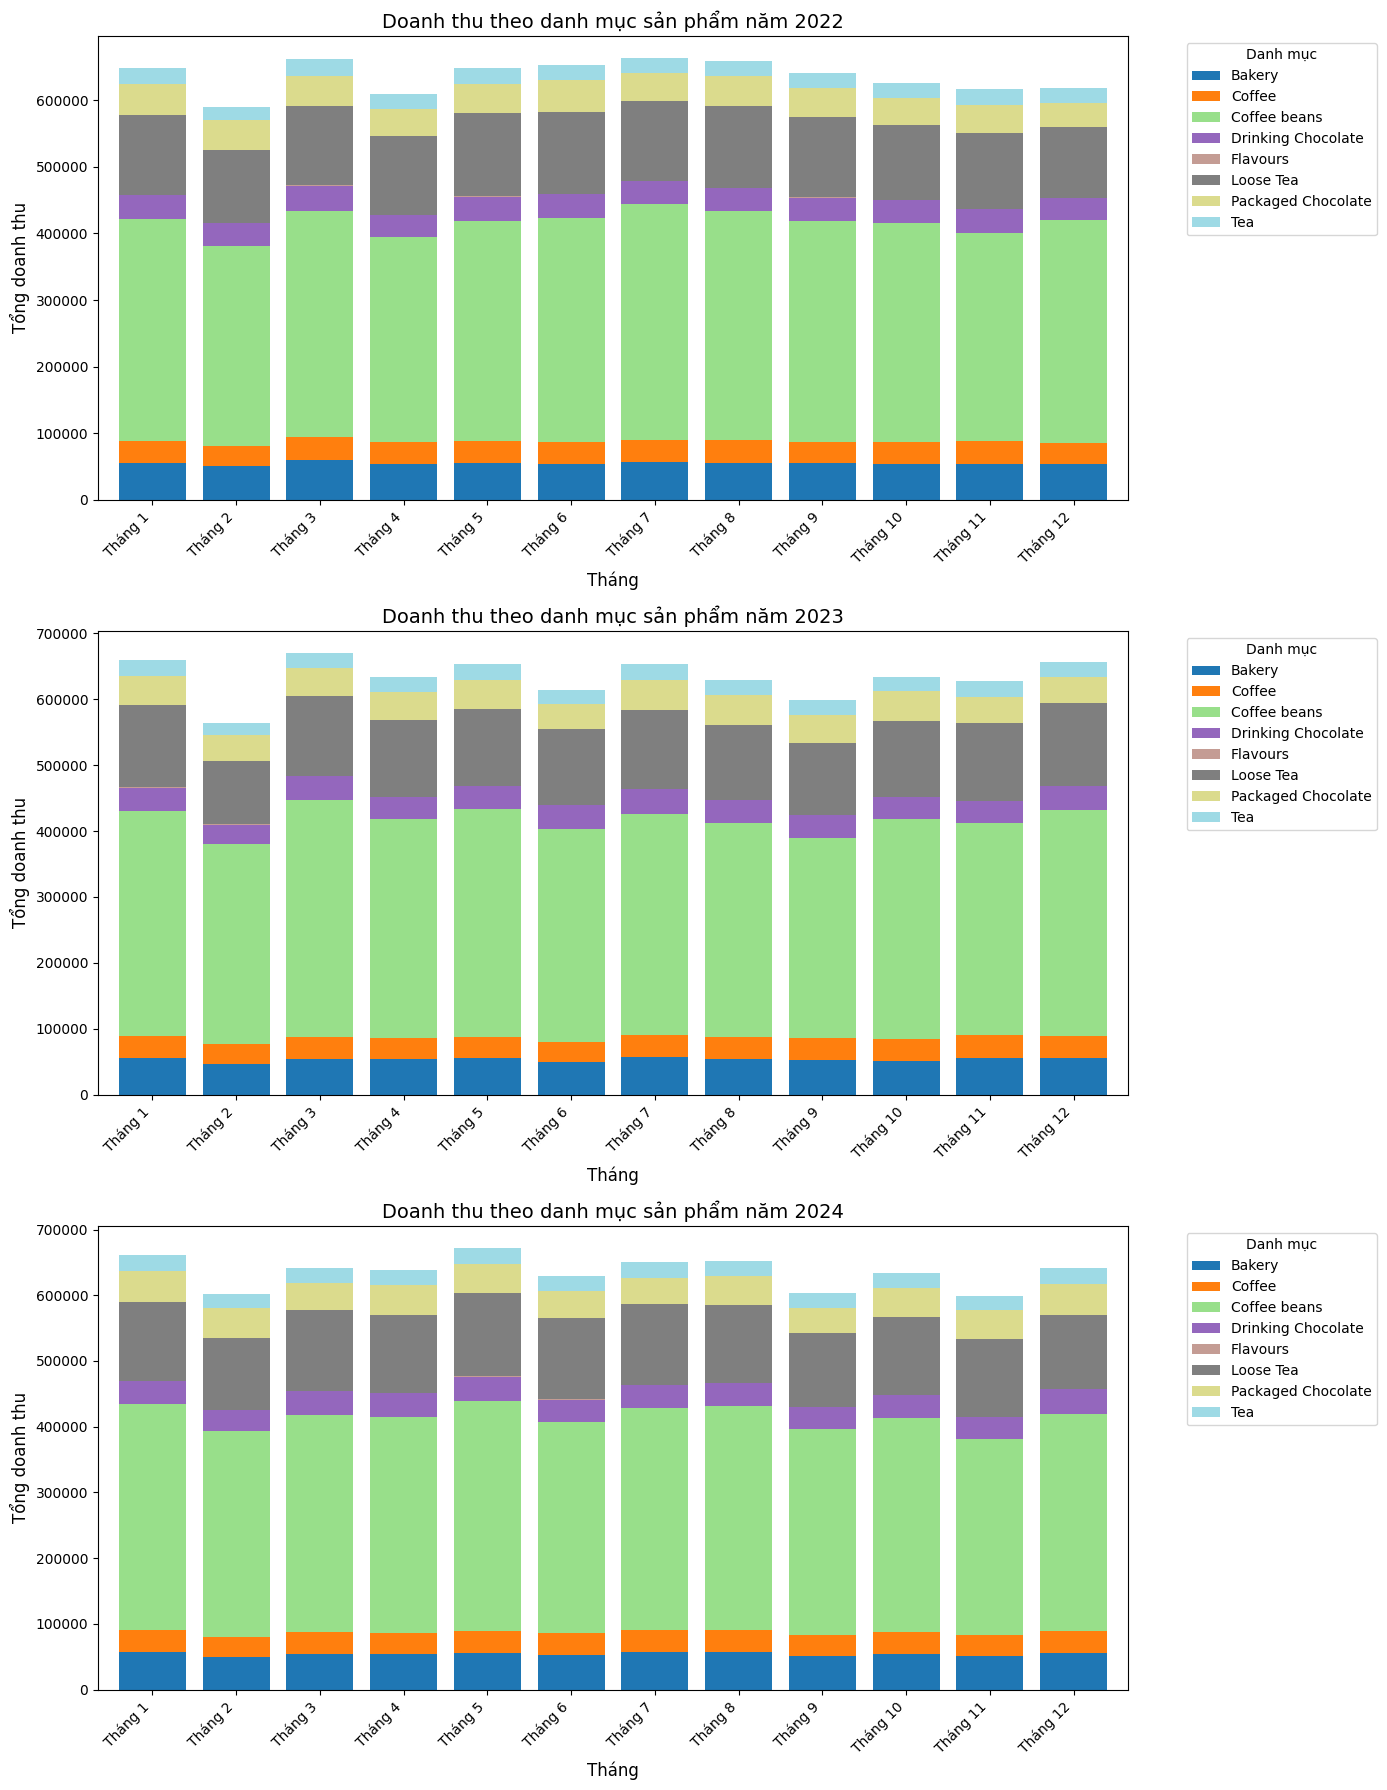

In [14]:
# Doanh thu sản phẩm theo tháng
revenue_by_category_month = order_with_items.groupby(['month_year', 'category'])['revenue'].sum().unstack(fill_value=0)
revenue_by_category_month.index = revenue_by_category_month.index.astype(str)

# Chia dữ liệu theo năm
revenue_2022 = revenue_by_category_month.loc['2022-01':'2022-12']
revenue_2023 = revenue_by_category_month.loc['2023-01':'2023-12']
revenue_2024 = revenue_by_category_month.loc['2024-01':'2024-12']

fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# 2022
revenue_2022.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=axes[0])
axes[0].set_title('Doanh thu theo danh mục sản phẩm năm 2022', fontsize=14)
axes[0].set_xlabel('Tháng', fontsize=12)
axes[0].set_ylabel('Tổng doanh thu', fontsize=12)
axes[0].legend(title='Danh mục', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].set_xticklabels([f'Tháng {i+1}' for i in range(12)], rotation=45, ha='right')

# 2023
revenue_2023.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=axes[1])
axes[1].set_title('Doanh thu theo danh mục sản phẩm năm 2023', fontsize=14)
axes[1].set_xlabel('Tháng', fontsize=12)
axes[1].set_ylabel('Tổng doanh thu', fontsize=12)
axes[1].legend(title='Danh mục', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].set_xticklabels([f'Tháng {i+1}' for i in range(12)], rotation=45, ha='right')

# 2024
revenue_2024.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=axes[2])
axes[2].set_title('Doanh thu theo danh mục sản phẩm năm 2024', fontsize=14)
axes[2].set_xlabel('Tháng', fontsize=12)
axes[2].set_ylabel('Tổng doanh thu', fontsize=12)
axes[2].legend(title='Danh mục', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_xticklabels([f'Tháng {i+1}' for i in range(12)], rotation=45, ha='right')

plt.tight_layout()
plt.show()

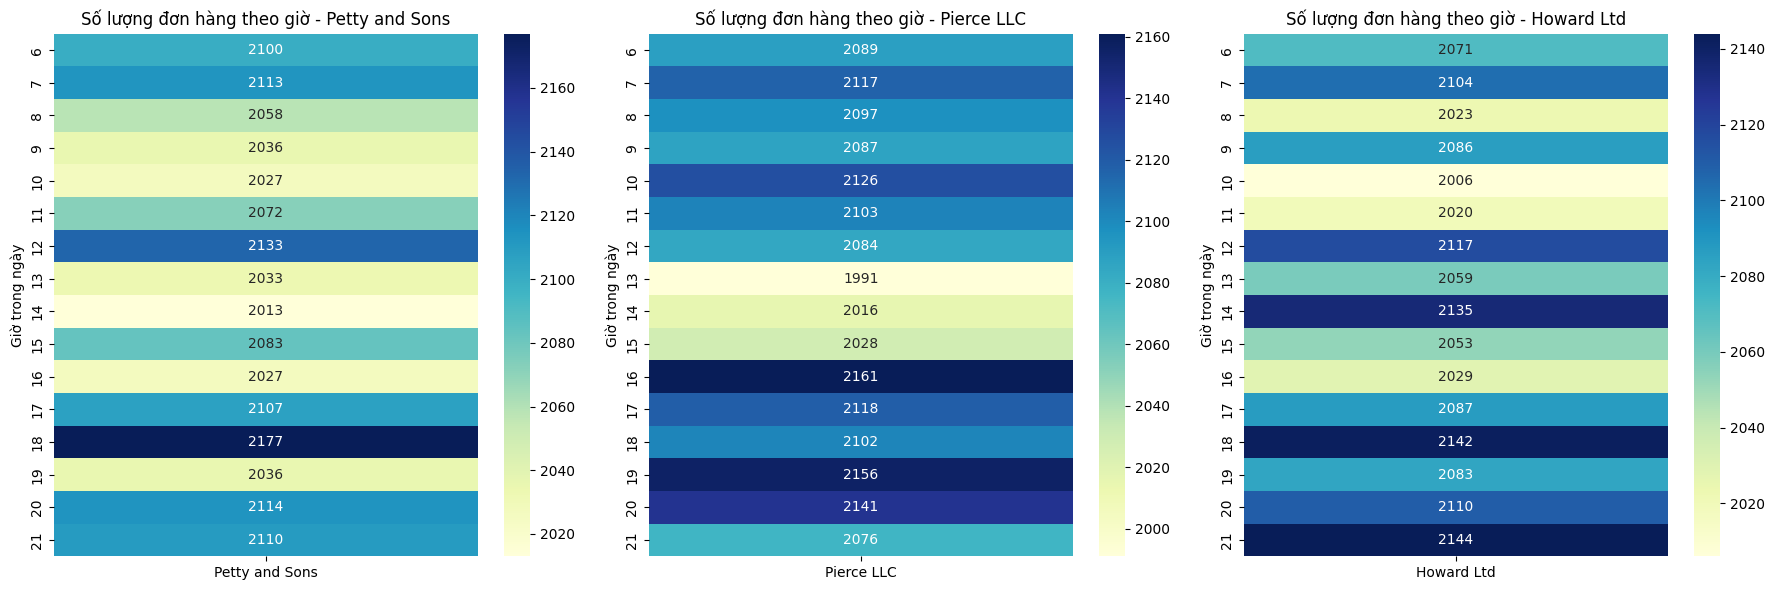

In [ ]:
# Merge order_data with department data to get department information
order_with_department = pd.merge(order_data, employee_data[['employeeId', 'departmentId']], on='employeeId', how='left')
order_with_department = pd.merge(order_with_department, department_data[['departmentId', 'name']], on='departmentId', how='left')

# Rename department name column to avoid confusion
order_with_department = order_with_department.rename(columns={'name': 'department_name'})

# Count orders by hour and department
orders_by_hour_dept = order_with_department.groupby(['hour', 'departmentId', 'department_name'])['orderId'].count().reset_index()

# Create pivot tables for each department
dept_ids = order_with_department['departmentId'].unique()

# Create plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, dept_id in enumerate(dept_ids):
    dept_data = orders_by_hour_dept[orders_by_hour_dept['departmentId'] == dept_id]
    dept_pivot = dept_data.pivot_table(index='hour', columns='department_name', values='orderId')
    
    # Convert data to integers for proper formatting
    dept_pivot = dept_pivot.fillna(0).astype(int)
    sns.heatmap(dept_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=axes[i])
    dept_name = dept_data['department_name'].iloc[0]
    axes[i].set_title(f'Số lượng đơn hàng theo giờ - {dept_name}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Giờ trong ngày', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2772636043.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='isHoliday', y='total_price', data=revenue_by_holiday_2022, palette='pastel')


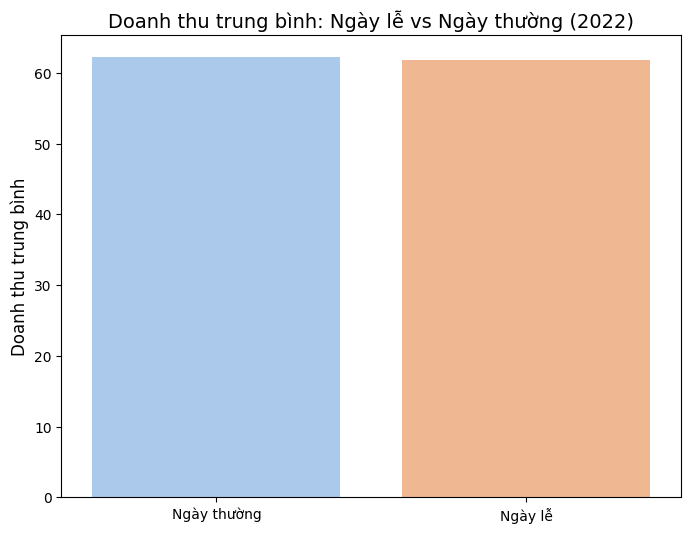

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2772636043.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='isHoliday', y='total_price', data=revenue_by_holiday_2023, palette='pastel')


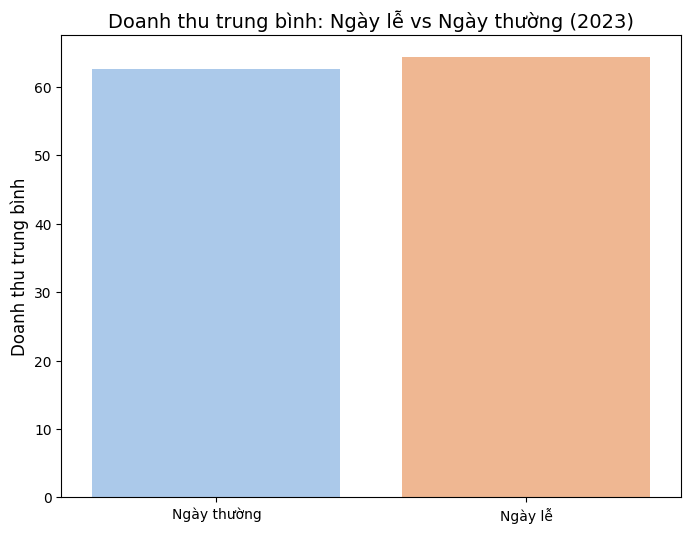

C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2772636043.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='isHoliday', y='total_price', data=revenue_by_holiday_2024, palette='pastel')


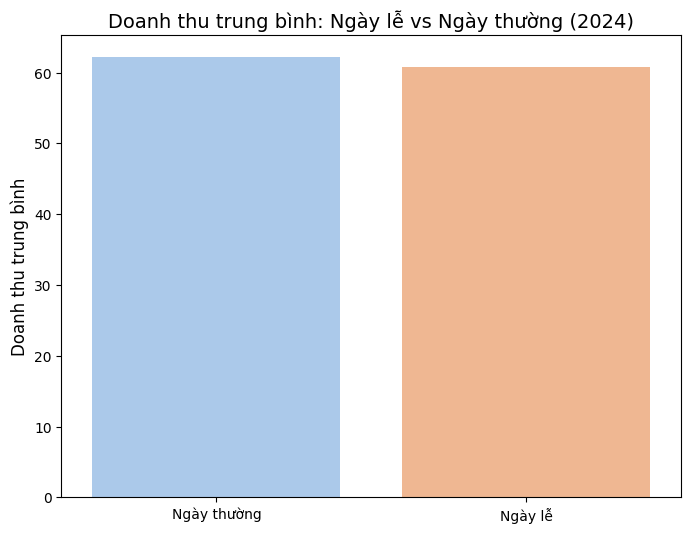

In [51]:
# 4. Phân tích doanh thu giữa ngày lễ và không phải ngày lễ

# Chuyển đổi cột holiday thành kiểu datetime\
date_data['dateID'] = pd.to_datetime(date_data['dateID'], format='%Y%m%d')
order_with_date = pd.merge(order_data, date_data,left_on='orderDate', right_on='dateID', how='left')

# Tính tổng doanh thu theo ngày lễ và không phải ngày lễ
# Tính tổng doanh thu theo ngày lễ và không phải ngày lễ cho từng năm
revenue_by_holiday_2022 = order_with_date[order_with_date['year'] == 2022].groupby('isHoliday')['total_price'].mean().reset_index()
revenue_by_holiday_2022['isHoliday'] = revenue_by_holiday_2022['isHoliday'].map({1: 'Ngày lễ', 0: 'Ngày thường'})

revenue_by_holiday_2023 = order_with_date[order_with_date['year'] == 2023].groupby('isHoliday')['total_price'].mean().reset_index()
revenue_by_holiday_2023['isHoliday'] = revenue_by_holiday_2023['isHoliday'].map({1: 'Ngày lễ', 0: 'Ngày thường'})

revenue_by_holiday_2024 = order_with_date[order_with_date['year'] == 2024].groupby('isHoliday')['total_price'].mean().reset_index()
revenue_by_holiday_2024['isHoliday'] = revenue_by_holiday_2024['isHoliday'].map({1: 'Ngày lễ', 0: 'Ngày thường'})

# Visualize revenue for 2022
plt.figure(figsize=(8, 6))
sns.barplot(x='isHoliday', y='total_price', data=revenue_by_holiday_2022, palette='pastel')
plt.title('Doanh thu trung bình: Ngày lễ vs Ngày thường (2022)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.show()

# Visualize revenue for 2023
plt.figure(figsize=(8, 6))
sns.barplot(x='isHoliday', y='total_price', data=revenue_by_holiday_2023, palette='pastel')
plt.title('Doanh thu trung bình: Ngày lễ vs Ngày thường (2023)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.show()

# Visualize revenue for 2024
plt.figure(figsize=(8, 6))
sns.barplot(x='isHoliday', y='total_price', data=revenue_by_holiday_2024, palette='pastel')
plt.title('Doanh thu trung bình: Ngày lễ vs Ngày thường (2024)', fontsize=14)
plt.xlabel('', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.show()



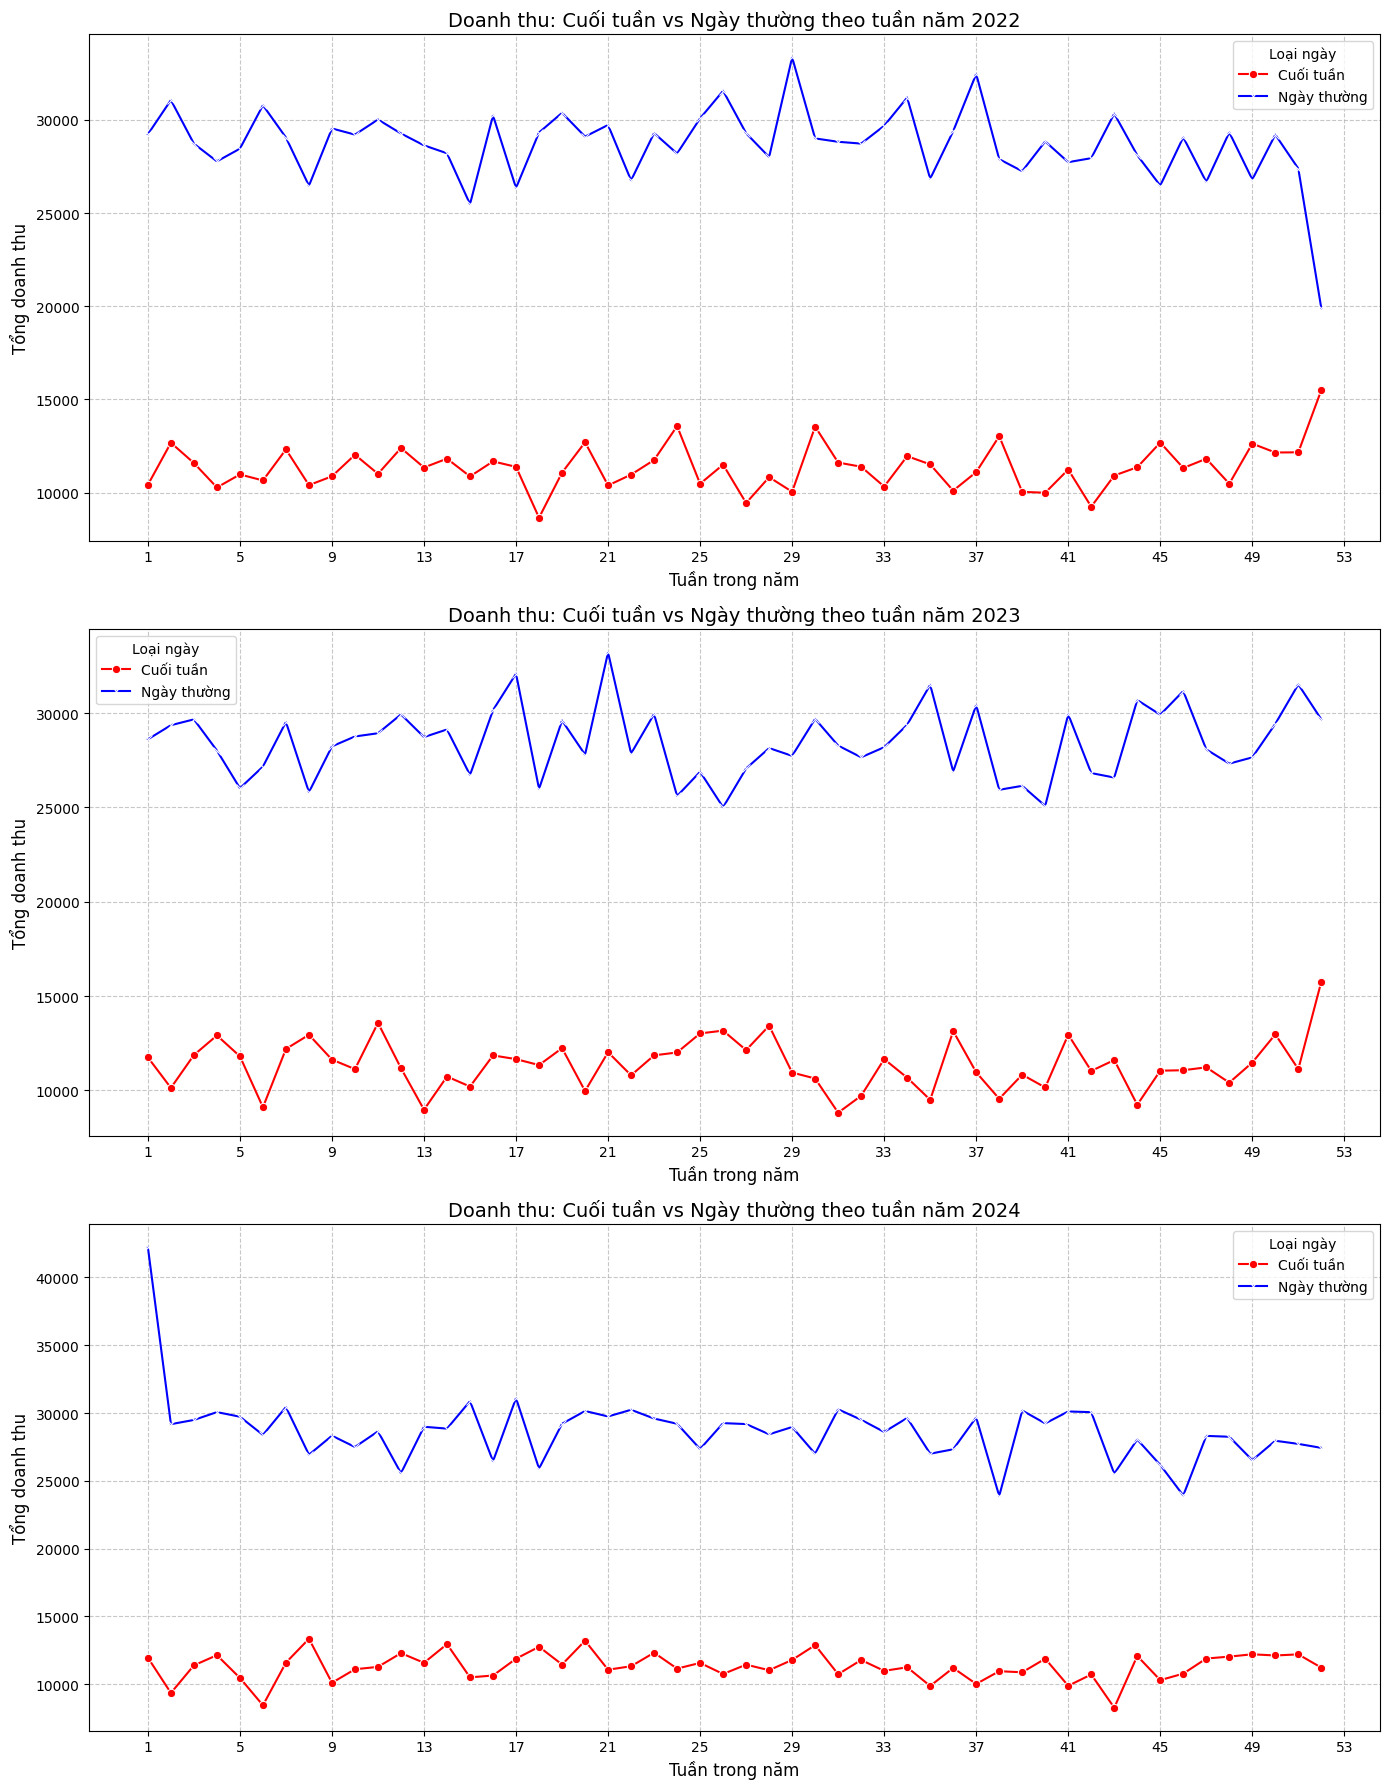

In [17]:
# Theo tuần
# Extract week number from the week_year string
order_with_date['week_number'] = order_with_date['orderDate'].dt.isocalendar().week
order_with_date['year'] = order_with_date['orderDate'].dt.year
order_with_date['week_label'] = 'Week ' + order_with_date['week_number'].astype(str)

# Group by week number, year and weekend status
revenue_by_week = order_with_date.groupby(['year', 'week_number', 'isWeekend'])['total_price'].sum().reset_index()
revenue_by_week['isWeekend'] = revenue_by_week['isWeekend'].map({1: 'Cuối tuần', 0: 'Ngày thường'})
revenue_by_week['week_year_label'] = revenue_by_week['year'].astype(str) + '-W' + revenue_by_week['week_number'].astype(str)

# Create separate plots for each year
years = [2022, 2023, 2024]
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

for i, year in enumerate(years):
    year_data = revenue_by_week[revenue_by_week['year'] == year]
    
    # Pivot data for better visualization
    pivot_data = year_data.pivot_table(index='week_number', columns='isWeekend', values='total_price', aggfunc='sum').reset_index()
    
    # Plot
    sns.lineplot(x='week_number', y='Cuối tuần', data=pivot_data, ax=axes[i], marker='o', label='Cuối tuần', color='red')
    sns.lineplot(x='week_number', y='Ngày thường', data=pivot_data, ax=axes[i], marker='x', label='Ngày thường', color='blue')
    
    axes[i].set_title(f'Doanh thu: Cuối tuần vs Ngày thường theo tuần năm {year}', fontsize=14)
    axes[i].set_xlabel('Tuần trong năm', fontsize=12)
    axes[i].set_ylabel('Tổng doanh thu', fontsize=12)
    axes[i].legend(title='Loại ngày')
    axes[i].set_xticks(range(1, 54, 4))  # Set x-ticks every 4 weeks
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# 5. Phân tích hành vi đổi quà và tích điểm

point_data = pd.merge(gift_exchange_data, customer_data[['customerId', 'point', 'age_group']], on='customerId', how='left')
point_data = pd.merge(point_data, gift_data[['giftId', 'name']], on='giftId', how='left')

# Phân khúc điểm đổi quà
bins_point = [0, 100, 200, 300, 400, 500, np.inf]
labels_point = ['0-100', '101-200', '201-300', '301-400', '401-500', '500+']
point_data['point_group'] = pd.cut(point_data['point'], bins=bins_point, labels=labels_point, right=False)

point_data.head()

# point_data['age_group'] = pd.cut(point_data['age_group'], bins=age_bins, labels=age_labels, right=False)

reward_by_point = point_data.groupby(['point_group', 'name'])['quantity'].sum().reset_index()
reward_by_age = point_data.groupby(['age_group','name'])['quantity'].sum().reset_index()


C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\30427569.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reward_by_point = point_data.groupby(['point_group', 'name'])['quantity'].sum().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\30427569.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  reward_by_age = point_data.groupby(['age_group','name'])['quantity'].sum().reset_index()


C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2368490268.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scatter_data = point_data.groupby(['point_group', 'age_group', 'name'])['quantity'].sum().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_27824\2368490268.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scatter_data = scatter_data.loc[scatter_data.groupby(['point_group', 'age_group'])['quantity'].idxmax()]


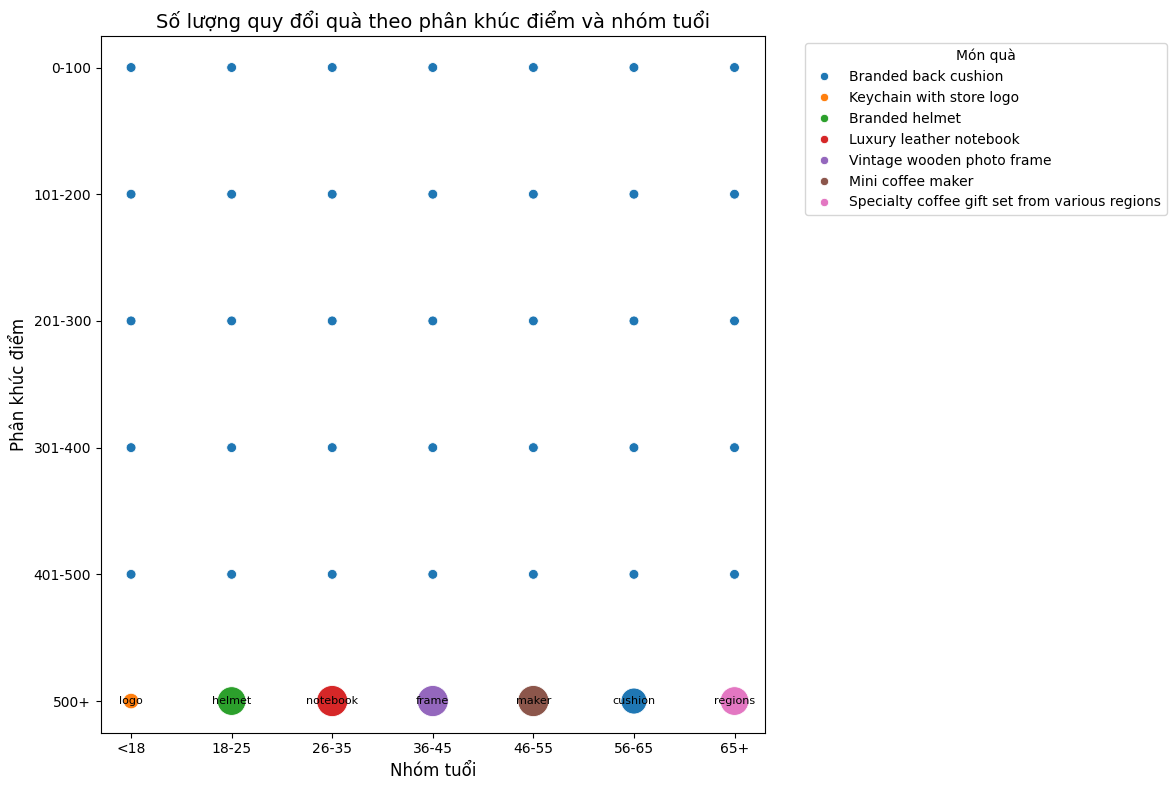

In [49]:
# Tính tổng số lượng quy đổi và món quà phổ biến
scatter_data = point_data.groupby(['point_group', 'age_group', 'name'])['quantity'].sum().reset_index()
scatter_data = scatter_data.loc[scatter_data.groupby(['point_group', 'age_group'])['quantity'].idxmax()]

# Chuyển đổi nhãn thành số để vẽ scatter plot
scatter_data['point_group_num'] = scatter_data['point_group'].map({
    '0-100': 50, '101-200': 150, '201-300': 250, '301-400': 350, '401-500': 450, '500+': 550
})
scatter_data['age_group_num'] = scatter_data['age_group'].map({
    '<18': 10, '18-25': 20, '26-35': 30, '36-45': 40, '46-55': 50, '56-65': 60, '65+': 70
})

# Tạo tên ngắn gọn cho hiển thị trên biểu đồ
scatter_data['short_name'] = scatter_data['name'].apply(lambda x: x.split()[-1] if len(x.split()) > 1 else x)

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='age_group_num', y='point_group_num', size='quantity', 
                         hue='name', data=scatter_data, sizes=(50, 500))

# Thêm nhãn cho từng điểm với tên ngắn hơn
for idx, row in scatter_data.iterrows():
    if row['quantity'] > 0:  # Chỉ hiển thị nhãn cho các điểm có số lượng > 0
        plt.text(row['age_group_num'], row['point_group_num'], row['short_name'], 
                fontsize=8, ha='center', va='center')

# Đặt nhãn và tiêu đề
plt.title('Số lượng quy đổi quà theo phân khúc điểm và nhóm tuổi', fontsize=14)
plt.xlabel('Nhóm tuổi', fontsize=12)
plt.ylabel('Phân khúc điểm', fontsize=12)
plt.xticks(ticks=[10, 20, 30, 40, 50, 60, 70], labels=['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
plt.yticks(ticks=[50, 150, 250, 350, 450, 550], labels=['0-100', '101-200', '201-300', '301-400', '401-500', '500+'])

# Di chuyển chú thích ra ngoài biểu đồ và chỉ hiển thị những món quà có số lượng > 0
handles, labels = scatter.get_legend_handles_labels()
legend_items = [(h, l) for h, l in zip(handles, labels) if l in scatter_data[scatter_data['quantity'] > 0]['name'].values]
if legend_items:
    h, l = zip(*legend_items)
    plt.legend(h, l, title='Món quà', bbox_to_anchor=(1.05, 1), loc='upper left')
else:
    plt.legend(title='Món quà', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()